In [51]:
from IPython.display import clear_output
from copy import copy,deepcopy 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from Path import *
from CustomKnot import *
from KnotDatabase import *
from KnotStar import *
from random import *
from KnotGA import *
from KnotAnt import *
from random import randint
np.set_printoptions(threshold=np.inf,linewidth=np.inf,nanstr="n")
pd.options.display.max_colwidth = 100

In [9]:
k_0_1_3 = CustomKnot([X(1,5,22,6), X(3,6,4,7), X(4,22,5,21), X(7,2,8,3), X(8,13,9,14), X(9,19,10,18), X(11,16,12,17), X(14,18,15,17), X(15,10,16,11), X(19,13,20,12), X(20,2,21,1)])

In [14]:
maxCrosses = 3
numberOfKnots = 140

masterDb = pd.read_csv("databases/master.csv") 
db = knotDatabase(maxCrosses,numberOfKnots,500,100,debug=True,initDB=masterDb)
#db.to_csv("databases/{}_{}.csv".format(maxCrosses,numberOfKnots))
masterDb = combineDatabase([db,masterDb])
masterDb.to_csv("databases/master.csv")

name 0_1 120
copy 120 , percentage: 85.71
percentage randomMovN: 100.00, numberOfStrands: 80 ,time remaining: <1s                                 
name 0_1 120
copy 120 , percentage: 85.71
percentage randomMovN: 100.00, numberOfStrands: 98 ,time remaining: <1s                                 
name 0_1 121
copy 121 , percentage: 86.43
percentage randomMovN: 100.00, numberOfStrands: 52 ,time remaining: <1s                                 
name 0_1 121
copy 121 , percentage: 86.43
percentage randomMovN: 100.00, numberOfStrands: 58 ,time remaining: <1s                                 
name 0_1 122
copy 122 , percentage: 87.14
percentage randomMovN: 100.00, numberOfStrands: 88 ,time remaining: <1s                                 
name 0_1 122
copy 122 , percentage: 87.14
percentage randomMovN: 100.00, numberOfStrands: 10 ,time remaining: <1s                                 
name 0_1 122
copy 122 , percentage: 87.14
percentage randomMovN: 100.00, numberOfStrands: 66 ,time remaining: <1s     

In [16]:
masterDb = pd.read_csv("databases/master.csv") 
for name in knotNamesList(7):
    print(name)
    nameDb = masterDb[masterDb.name == name]
    i=0
    knotSet = set()
    for index, row in nameDb.iterrows():
        i+=1
        crosses = row["crosses"]
        knot = CustomKnot(crosses)
        knotSet.add(knot.representationForHash)

    print(i)
    print(len(knotSet))


0_1
503
503
3_1
502
502
4_1
243
243
5_1
245
245
5_2
244
244
6_1
246
246
6_2
244
244
6_3
244
244
7_1
246
246
7_2
246
246
7_3
243
243
7_4
245
245
7_5
246
246
7_6
244
244
7_7
247
247


In [11]:
masterDb = createPDsForDatabase(masterDb)

In [12]:
display(masterDb)

,name,crosses,numberOfStrands,pd
0,0_1,"[X(1,11,2,10), X(3,8,4,9), X(4,19,5,20), X(6,16,7,15), X(11,1,12,20), X(12,10,13,9), X(13,2,14,3...",20,"np.array([[17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 0, 0, 0, 0, 0, ..."
1,0_1,[],0,"np.array([[1, 1, 1],\n [1, 0, 1],\n [1, 1, 1]])"
2,0_1,"[X(1,10,2,11), X(2,6,3,5), X(3,17,4,16), X(6,13,7,14), X(7,19,8,18), X(8,12,9,11), X(9,20,10,1),...",20,"np.array([[11, 11, 11, 11, 11, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5],\n [11, 9,..."
3,0_1,"[X(1,8,22,7), X(2,14,3,13), X(4,11,5,12), X(8,21,9,22), X(9,6,10,7), X(14,20,15,19), X(15,10,16,...",22,"np.array([[15, 15, 15, 15, 15, 15, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0_1,"[X(1,6,12,5), X(4,10,5,9), X(6,1,7,2), X(8,4,9,3), X(10,8,11,7), X(11,3,12,2)]",12,"np.array([[ 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0],\n [ 0, 10, 0,..."
...,...,...,...,...
4061,7_7,"[X(1,16,22,15), X(2,5,3,6), X(3,19,4,18), X(6,18,7,17), X(7,20,8,21), X(9,14,10,15), X(10,2,11,1...",22,"np.array([[ 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10],\n [ 5, 19,..."
4062,7_7,"[X(1,17,28,18), X(1,20,2,21), X(5,23,6,22), X(6,4,7,3), X(8,25,9,26), X(10,28,11,27), X(12,9,13,...",28,"np.array([[ 0, 0, 0, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4063,7_7,"[X(1,13,20,14), X(1,16,2,17), X(4,12,5,11), X(8,15,9,16), X(9,7,10,6), X(10,20,11,19), X(12,4,13...",20,"np.array([[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1..."
4064,7_7,"[X(1,13,22,14), X(2,12,3,11), X(6,15,7,16), X(8,20,9,19), X(10,4,11,3), X(12,2,13,1), X(14,5,15,...",22,"np.array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
masterDb.to_csv("databases/masterPD.csv")

In [15]:
masterDbImages = createImagesForDatabase(limitNumberOfCrosses = 7,limitNumberOfImages = 500, debug=0)
display(masterDbImages)
masterDbImages.to_csv("databases/masterDbImages.csv")

CalculateImages
knot 0_1, percentage 100.00      
knot 3_1, percentage 100.00      
knot 4_1, percentage 100.00      
knot 5_1, percentage 100.00      
knot 5_2, percentage 100.00      
knot 6_1, percentage 100.00      
knot 6_2, percentage 100.00      
knot 6_3, percentage 100.00      
knot 7_1, percentage 100.00      
knot 7_2, percentage 100.00      
knot 7_3, percentage 100.00      
knot 7_4, percentage 100.00      
knot 7_5, percentage 100.00      
knot 7_6, percentage 100.00      
knot 7_7, percentage 100.00      
percentage normalize: 100.00        


,name,image
0,0_1,"[(365, 365), (177, 177), (177, 178), (177, 179), (177, 180), (177, 181), (177, 182), (177, 183),..."
1,0_1,"[(365, 365), (152, 157), (152, 158), (152, 159), (152, 160), (152, 161), (152, 162), (152, 163),..."
2,0_1,"[(365, 365), (159, 172), (159, 173), (159, 174), (159, 175), (159, 176), (159, 177), (159, 178),..."
3,0_1,"[(365, 365), (154, 177), (154, 178), (154, 179), (154, 180), (154, 181), (154, 182), (154, 183),..."
4,0_1,"[(365, 365), (152, 164), (152, 165), (152, 166), (152, 167), (152, 168), (152, 169), (152, 170),..."
...,...,...
4056,7_7,"[(365, 365), (132, 139), (132, 140), (132, 141), (132, 142), (132, 143), (132, 144), (132, 145),..."
4057,7_7,"[(365, 365), (139, 54), (139, 55), (139, 56), (139, 57), (139, 58), (139, 59), (139, 60), (139, ..."
4058,7_7,"[(365, 365), (109, 122), (109, 123), (109, 124), (109, 125), (109, 126), (109, 127), (109, 128),..."
4059,7_7,"[(365, 365), (107, 49), (107, 50), (107, 51), (107, 52), (107, 53), (107, 54), (107, 55), (107, ..."


In [69]:
def readMasterDatabaseImages(pathDBImages = "databases/masterDbImages.csv", maxNumberOfCross = 3):
    masterDb = pd.read_csv(pathDBImages)
    array:List[Tuple[str,np.ndarray]] = []
    for index, row in masterDb.iterrows():
        name = row["name"]
        numberOfCross = int(name[0])
        if numberOfCross <= maxNumberOfCross:
            ci = CompactWBImage(eval(row["image"]))
            image = ci.image
            array.append((deepcopy(name),deepcopy(image)))
    return array


def minShiftMaxShift(image,axis):
    maxAxis = np.max(image,axis=axis)
    firstIndex = np.argmax(maxAxis)
    lastIndex = len(image)-np.argmax(np.flip(maxAxis))-1
    minShift = -firstIndex
    maxShift = len(image)-1-lastIndex
    return minShift, maxShift

def shiftingImage(image):
    minShift, maxShift = minShiftMaxShift(image,axis=0)
    ox = randint(minShift,maxShift)
    minShift, maxShift = minShiftMaxShift(image,axis=1)
    oy = randint(minShift,maxShift)

    non = lambda s: s if s<0 else None
    mom = lambda s: max(0,s)

    shift_image = np.zeros_like(image)
    shift_image[mom(oy):non(oy), mom(ox):non(ox)] = image[mom(-oy):non(-oy), mom(-ox):non(-ox)]
    
    return shift_image

def randomRotate(image):
    return np.rot90(image, k = randint(1,4))

def expandDatabase(pathDBImages = "databases/masterDbImages.csv", numberExpansion = 10):
    print("Reading Master Database")
    array = readMasterDatabaseImages(pathDBImages=pathDBImages)
    print("Reade Master Database")
    auxDict = {"name":[],"image":[]}
    print("Expanding") 
    for i in range(len(array)):
        name, image = array[i]
        for _ in range(numberExpansion):
            nameCopy = deepcopy(name)
            imageCopy = deepcopy(image)
            auxDict["name"].append(nameCopy)
            imageCopy = randomRotate(imageCopy)
            imageCopy = shiftingImage(imageCopy)
            auxDict["image"].append(imageCopy)
        print("percentage Expansion: {:3.2f}        ".format(100*(i+1)/len(array)),end="\r")
    print("Compacting")            
    for i in range(len(auxDict["image"])):
        ci = CompactWBImage(auxDict["image"][i])
        auxDict["image"][i] = ci.compact
        print("percentage Compact: {:3.2f}        ".format(100*(i+1)/len(auxDict["image"])),end="\r")
    return pd.DataFrame(auxDict)
db = expandDatabase()
display(db)
db.to_csv("databases/masterPDImageExpanded.csv")

Expanding
Compacting Expansion: 100.00        


,name,image
0,0_1,"[(365, 365), (72, 201), (72, 202), (72, 203), (72, 204), (72, 205), (72, 206), (72, 207), (72, 2..."
1,0_1,"[(365, 365), (182, 317), (182, 318), (182, 319), (182, 320), (182, 321), (182, 322), (182, 323),..."
2,0_1,"[(365, 365), (317, 13), (317, 14), (317, 15), (317, 16), (317, 17), (317, 18), (317, 19), (317, ..."
3,0_1,"[(365, 365), (122, 184), (122, 185), (122, 186), (122, 187), (122, 188), (122, 189), (122, 190),..."
4,0_1,"[(365, 365), (291, 188), (291, 189), (291, 190), (291, 191), (291, 192), (291, 193), (291, 194),..."
...,...,...
9995,3_1,"[(365, 365), (33, 201), (33, 202), (33, 203), (33, 204), (33, 205), (33, 206), (33, 207), (33, 2..."
9996,3_1,"[(365, 365), (162, 205), (162, 206), (162, 207), (162, 208), (162, 209), (162, 210), (162, 211),..."
9997,3_1,"[(365, 365), (17, 28), (17, 29), (17, 30), (17, 31), (17, 32), (17, 33), (17, 34), (17, 35), (17..."
9998,3_1,"[(365, 365), (176, 273), (176, 274), (176, 275), (176, 276), (176, 277), (176, 278), (176, 279),..."


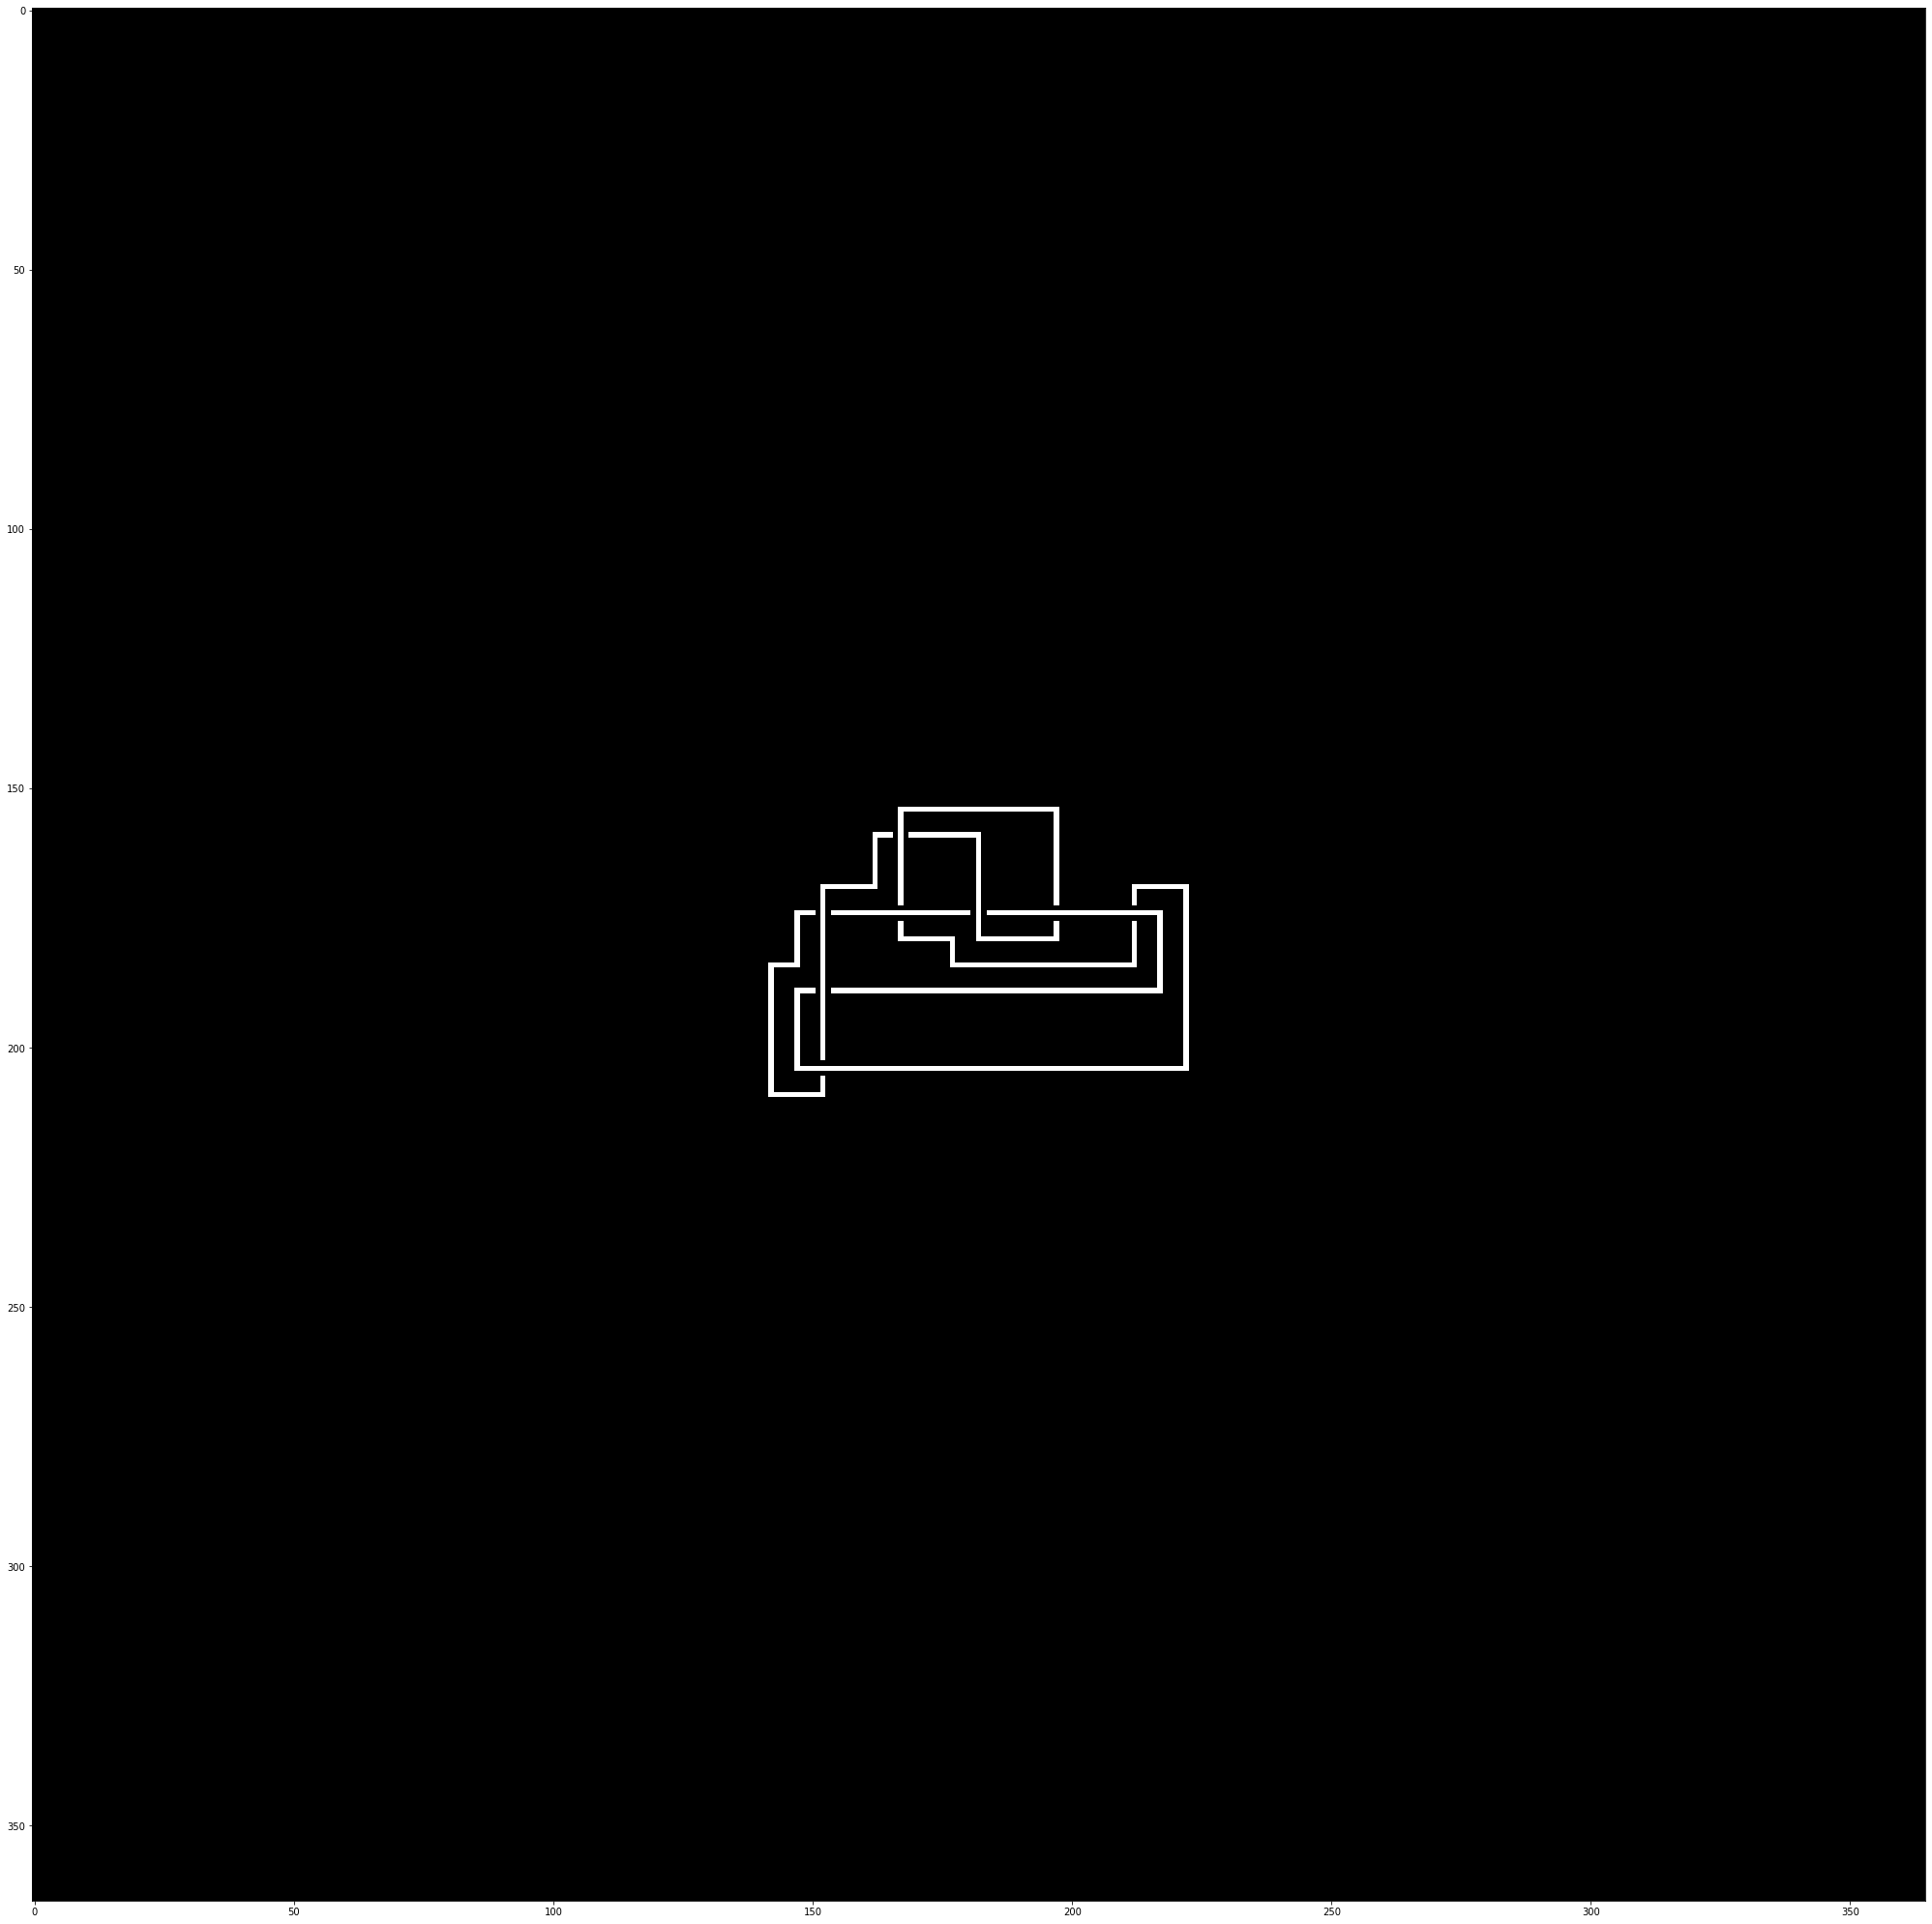

In [24]:
for index,row in masterDbImages.iterrows():
    if index>40:break
    image: np.ndarray = CompactWBImage(row.image).image



fig, ax = plt.subplots(figsize=(image.shape[0]//(grosor*2),image.shape[1]//(grosor*2)))
ax.imshow(image,cmap='gray')

[0 0 0]
0
[0 0 0]
3
[0 0 0 0]
0
[0 0 0 0]
3
(-142, 142)
(-154, 155)


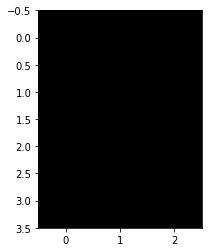

In [50]:
a = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0]])

fig, ax = plt.subplots()
ax.imshow(a,cmap='gray')

print(np.max(a,axis=0))
print(np.argmax(np.max(a,axis=0)==1))

print(np.flip(np.max(a,axis=0)))
print(len(a)-np.argmax(np.flip(np.max(a,axis=0)))-1)


print(np.max(a,axis=1))
print(np.argmax(np.max(a,axis=1)==1))

print(np.flip(np.max(a,axis=1)))
print(len(a)-np.argmax(np.flip(np.max(a,axis=1)))-1)




print(maxShiftMinShift(image,axis=0))
print(maxShiftMinShift(image,axis=1))

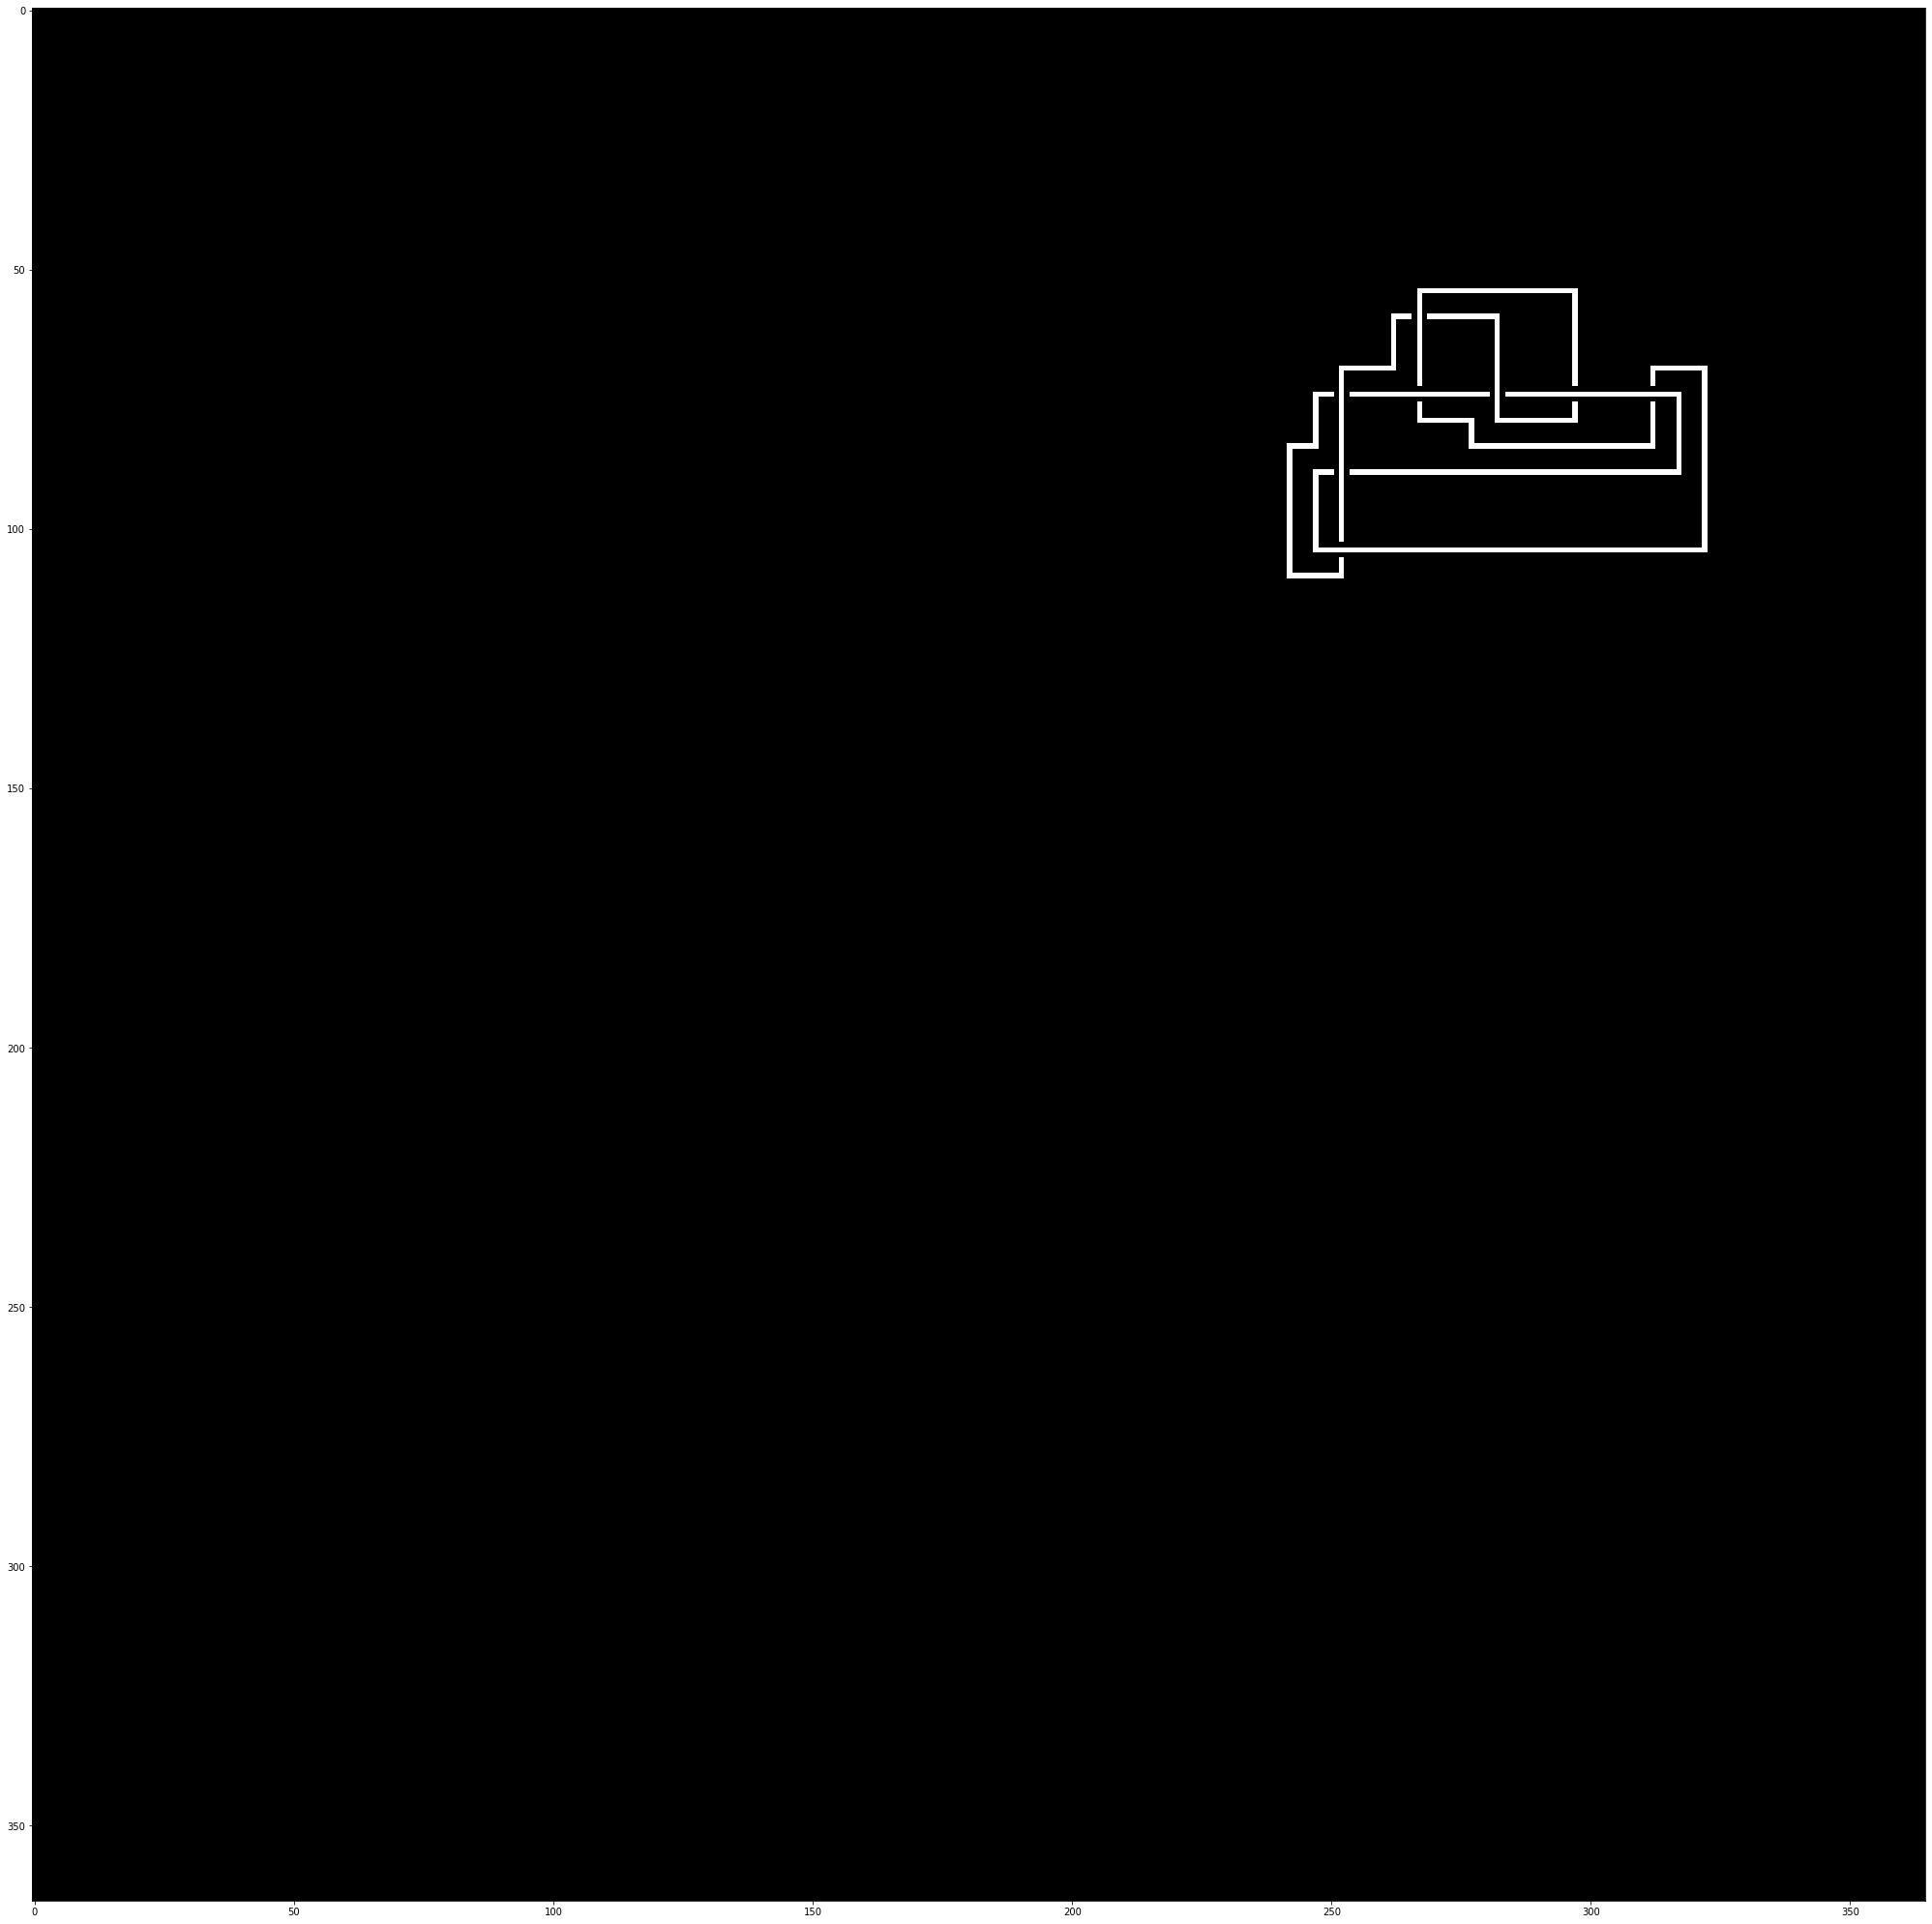

In [28]:
non = lambda s: s if s<0 else None
mom = lambda s: max(0,s)

ox, oy = 100, -100

shift_lena = np.zeros_like(image)
shift_lena[mom(oy):non(oy), mom(ox):non(ox)] = image[mom(-oy):non(-oy), mom(-ox):non(-ox)]



fig, ax = plt.subplots(figsize=(shift_lena.shape[0]//(grosor*2),shift_lena.shape[1]//(grosor*2)))
ax.imshow(shift_lena,cmap='gray')

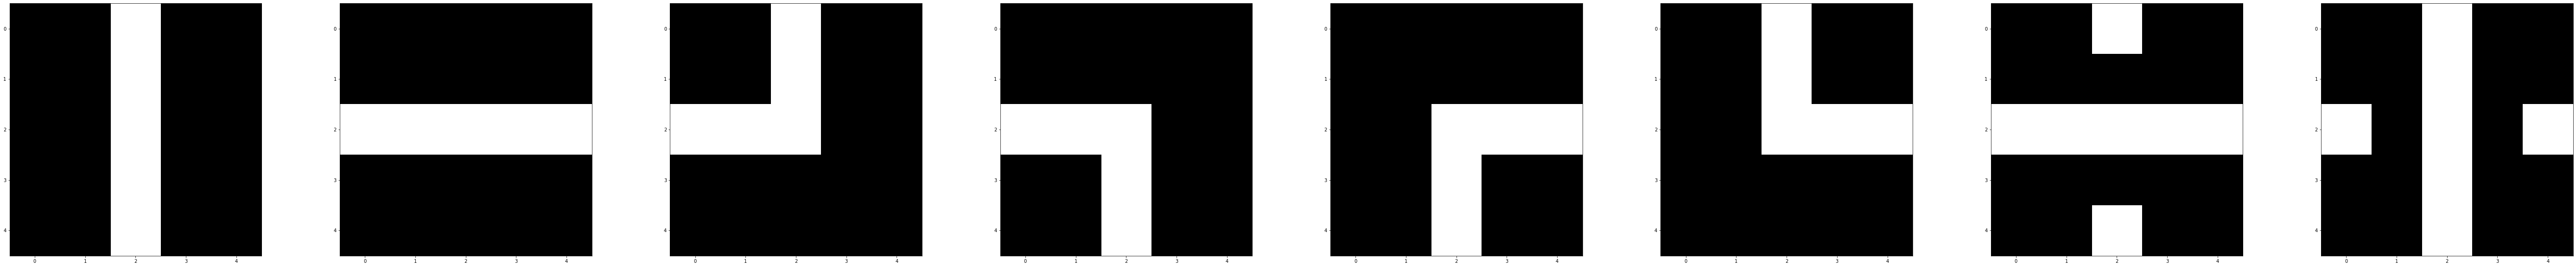

In [17]:



fig, ax = plt.subplots(1,8,figsize=(100,10))
ax[0].imshow(upDown,cmap='gray')
ax[1].imshow(leftRight,cmap='gray')
ax[2].imshow(upLeft,cmap='gray')
ax[3].imshow(downLeft,cmap='gray')
ax[4].imshow(downRight,cmap='gray')
ax[5].imshow(upRight,cmap='gray')
ax[6].imshow(cross1,cmap='gray')
ax[7].imshow(cross2,cmap='gray')


In [20]:



ci = CompactWBImage(image)

print(ci.image.shape[0]*ci.image.shape[1])
print(len(ci.compact)*2)




44100
1588


In [23]:
print('time():', ctime(time()))

time(): Sun Sep 11 18:34:17 2022


In [5]:



i =100
printLog("hola",i)




18:45:27 hola 100
